In [15]:
import pandas as pd

# Load the dataset with column names using whitespace as delimiter
column_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
df = pd.read_csv("housing.csv", sep='\s+', names=column_names)

# Display the first few rows of the dataframe
print("First few rows of the dataframe:")
df.head()


First few rows of the dataframe:


<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\server\AppData\Local\Temp\ipykernel_19408\743882595.py:5: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("housing.csv", sep='\s+', names=column_names)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


#### Observation:
##### ->There is significant variation in socio-economic indicators across different areas, such as crime rates, property tax rates, and median home values.
##### ->Housing characteristics (e.g., number of rooms, age of buildings) also vary, reflecting diverse types of residential areas.
##### ->Environmental factors like nitric oxide concentration and distance to employment centers show differences in the living conditions and connectivity of the neighborhoods.

### Missing value and its treatment

In [16]:
# Identify missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column (including zeros):")
print(missing_values)


Missing values in each column (including zeros):
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


#### Since here there are no missing values no need to treat it

### Check for normal distribution using Anderson Darling Test

In [18]:
import scipy.stats as stats

# Function to perform Anderson-Darling Test
def anderson_darling_test(data, column):
    result = stats.anderson(data[column], dist='norm')
    print(f'Anderson-Darling Test for {column}:')
    print(f'Statistic: {result.statistic}')
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < cv:
            print(f'At {sl}% significance level, the data looks normal (statistic {result.statistic} < critical value {cv}).')
        else:
            print(f'At {sl}% significance level, the data does not look normal (statistic {result.statistic} >= critical value {cv}).')
    print()

# List of numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

# Perform the Anderson-Darling test for each numerical column
for column in numerical_cols:
    anderson_darling_test(df, column)

Anderson-Darling Test for CRIM:
Statistic: 86.76289903052646
At 15.0% significance level, the data does not look normal (statistic 86.76289903052646 >= critical value 0.572).
At 10.0% significance level, the data does not look normal (statistic 86.76289903052646 >= critical value 0.651).
At 5.0% significance level, the data does not look normal (statistic 86.76289903052646 >= critical value 0.781).
At 2.5% significance level, the data does not look normal (statistic 86.76289903052646 >= critical value 0.911).
At 1.0% significance level, the data does not look normal (statistic 86.76289903052646 >= critical value 1.084).

Anderson-Darling Test for ZN:
Statistic: 98.1823442217052
At 15.0% significance level, the data does not look normal (statistic 98.1823442217052 >= critical value 0.572).
At 10.0% significance level, the data does not look normal (statistic 98.1823442217052 >= critical value 0.651).
At 5.0% significance level, the data does not look normal (statistic 98.1823442217052 >

#### What is Anderson-Darling Test
##### ->The Anderson-Darling test is a statistical test used to determine if a given sample of data comes from a specific distribution, most commonly the normal distribution. It is an extension of the Kolmogorov-Smirnov test and provides a more sensitive measure of how well the data follows the hypothesized distribution.
##### ->Purpose: To test the null hypothesis that a sample comes from a specified distribution, such as the normal distribution.
##### ->Test Statistic: It calculates a test statistic that measures the distance between the empirical distribution of the sample data and the cumulative distribution function (CDF) of the specified distribution.
#### Since the Dataset is not Normally Distributed, therefore we should use IQR instead of Z-score and DBSCAN for outlier detection

### The Dataset is not normally distributed 

### Outlier Detecion using Z-Score

In [23]:
# List of numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

# Function to detect outliers using Z-score
def detect_outliers_z_score(data, columns, threshold=3):
    outlier_indices = set()
    
    for column in columns:
        # Calculate Z-scores
        z_scores = np.abs(stats.zscore(data[column], nan_policy='omit'))
        # Identify outliers
        column_outliers = data[z_scores > threshold]
        outlier_indices.update(column_outliers.index)
    
    return list(outlier_indices)

# Detect global outliers using Z-score
global_outliers_z_score = detect_outliers_z_score(df, numerical_cols)

# Display the number of global outliers and the outlier rows
print(f"\nTotal number of global outliers detected (using Z-score): {len(global_outliers_z_score)}")
print("\nRows with outliers:")
print(df.loc[global_outliers_z_score])


Total number of global outliers detected (using Z-score): 91

Rows with outliers:
        CRIM     ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
55   0.01311   90.0   1.22     0  0.403  7.249   21.9  8.6966    5  226.0   
56   0.02055   85.0   0.74     0  0.410  6.383   35.7  9.1876    2  313.0   
57   0.01432  100.0   1.32     0  0.411  6.816   40.5  8.3248    5  256.0   
102  0.22876    0.0   8.56     0  0.520  6.405   85.4  2.7147    5  384.0   
141  1.62864    0.0  21.89     0  0.624  5.019  100.0  1.4394    4  437.0   
..       ...    ...    ...   ...    ...    ...    ...     ...  ...    ...   
454  9.51363    0.0  18.10     0  0.713  6.728   94.1  2.4961   24  666.0   
455  4.75237    0.0  18.10     0  0.713  6.525   86.5  2.4358   24  666.0   
456  4.66883    0.0  18.10     0  0.713  5.976   87.9  2.5806   24  666.0   
457  8.20058    0.0  18.10     0  0.713  5.936   80.3  2.7792   24  666.0   
466  3.77498    0.0  18.10     0  0.655  5.952   84.7  2.8715   24  66

In [24]:
# Drop the rows with outliers
df_cleaned = df.drop(index=global_outliers_z_score)

# Display the number of rows remaining after dropping outliers
print(f"\nNumber of rows remaining after dropping outliers: {df_cleaned.shape[0]}")


Number of rows remaining after dropping outliers: 415


#### Why we should do outlier detection?
##### ->Enhances Data Quality: Reduces noise and inaccuracies, resulting in cleaner and more reliable data.
##### ->Ensures Accurate Scaling: Prevents outliers from skewing feature scaling, leading to more effective data preprocessing.
##### ->Validates Statistical Tests: Maintains the validity of statistical assumptions and analyses.
##### ->Prevents Overfitting: Reduces the risk of models fitting to outliers, improving generalization to new data.
##### ->Stabilizes Training: Helps algorithms converge more reliably and produce stable results.
##### ->Clarifies Visualization: Provides clearer insights by avoiding distortion in data visualizations.

### Performing feature scaling and normalisation

In [28]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Separate features and target
features = df_cleaned[numerical_cols].drop(columns='MEDV')
target = df_cleaned['MEDV']

# Feature Scaling (Standardization)
scaler = StandardScaler()
features_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# Normalization
normalizer = MinMaxScaler()
features_normalized = pd.DataFrame(normalizer.fit_transform(features), columns=features.columns)

# Display results
print("\nFeatures after scaling (standardization):")
print(features_scaled.head())
print("\nFeatures after normalization:")
print(features_normalized.head())


Features after scaling (standardization):
       CRIM        ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0 -0.500097  0.427278 -1.254663   0.0 -0.083120  0.503296 -0.077906  0.120954   
1 -0.495805 -0.488581 -0.553675   0.0 -0.708718  0.251194  0.410713  0.567909   
2 -0.495810 -0.488581 -0.553675   0.0 -0.708718  1.501880 -0.224135  0.567909   
3 -0.494771 -0.488581 -1.273808   0.0 -0.808451  1.195757 -0.769819  1.125951   
4 -0.487272 -0.488581 -1.273808   0.0 -0.808451  1.439673 -0.470228  1.125951   

        RAD       TAX   PTRATIO         B     LSTAT  
0 -0.938612 -0.607776 -1.483794  0.439914 -1.128221  
1 -0.816465 -0.943176 -0.312853  0.439914 -0.484935  
2 -0.816465 -0.943176 -0.312853  0.360916 -1.275125  
3 -0.694319 -1.067398  0.108686  0.395854 -1.443679  
4 -0.694319 -1.067398  0.108686  0.439914 -1.074098  

Features after normalization:
       CRIM     ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0  0.000000  0.225  0.067815   0.0  0

#### Feature scaling and normalization help in making the model more efficient, stable, and accurate by ensuring all features are on a comparable scale.

### Split the data into training and testing sets.


## 1.Ridge Regression

In [47]:
from sklearn.metrics import mean_absolute_error

# Initialize the Ridge Regression model
ridge_reg = Ridge(alpha=1.0)  # You can adjust the alpha parameter

# Fit the model on the training data
ridge_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ridge_reg.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R-squared
n = X_test.shape[0]  # Number of observations
p = X_test.shape[1]  # Number of predictors
r2_adj = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Adjusted R-squared: {r2_adj}")


Mean Absolute Error: 3.4664376728576776
Mean Squared Error: 27.18254287458571
R-squared: 0.6326597790742673
Adjusted R-squared: 0.5634507519433322


#### Obsservation:
#### Mean Absolute Error (MAE): 3.47
##### ->This value represents the average magnitude of the errors in predictions, with each error being the absolute difference between the predicted and actual housing prices. An MAE of 3.47 indicates that, on average, the model’s predictions deviate from the actual values by approximately $3,470.
#### Mean Squared Error (MSE): 27.18
##### ->MSE measures the average of the squared differences between predicted and actual values. It penalizes larger errors more than MAE, which helps in understanding the variance in prediction errors. An MSE of 27.18 indicates that the average squared deviation of the predicted housing prices from the actual values is 27.18 (in thousands of dollars squared).
#### R-squared (R²): 0.63
##### ->R-squared indicates the proportion of the variance in the dependent variable (housing prices) that is predictable from the independent variables. An R² of 0.63 suggests that approximately 63% of the variability in housing prices is explained by the features included in the model. This indicates a moderate to good fit of the model to the data.
#### Adjusted R-squared: 0.56
##### ->Adjusted R-squared adjusts the R-squared value for the number of predictors in the model. It provides a more accurate measure when comparing models with different numbers of predictors. An Adjusted R-squared of 0.56 suggests that, after adjusting for the number of features, the model still explains about 56% of the variance in housing prices. This indicates that the model retains a good explanatory power even after accounting for the complexity of the model.

### Model Evaluation

### Visualise the model's performance using plots (e.g., actual vs. predicted prices).


### Scatter Plot of Actual vs. Predicted Values

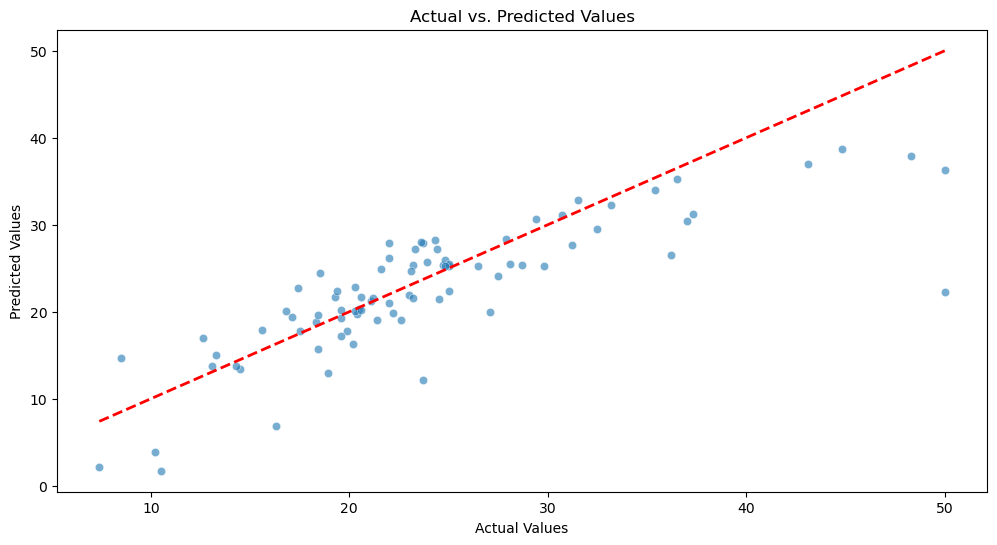

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of Actual vs. Predicted values
plt.figure(figsize=(12, 6))

# Plotting
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()


#### Observation
#### Plot Description:
##### ->Axes: The x-axis represents the actual values, and the y-axis represents the predicted values.
##### ->Data Points: Each point on the plot represents a pair of actual and predicted values.
##### ->Line of Best Fit: A red dashed line representing the ideal scenario where predicted values exactly match the actual values (i.e., the line y=x).
#### Analysis:
##### ->Distribution: The points are scattered around the line of best fit, indicating a certain level of correlation between actual and predicted values.
##### ->Trend: The general trend shows that as the actual values increase, the predicted values also tend to increase, which is a good sign.
##### ->Deviation: There is some deviation from the ideal line, especially noticeable for higher actual values. This suggests that the model might be less accurate for higher values.
#### Interpretation:
##### ->Good Fit: The scatter plot suggests that the model has a reasonable fit, with many points close to the line of best fit.
#### Errors: Points that are far from the line indicate larger prediction errors. These outliers could be due to noise in the data or limitations in the model's ability to capture the underlying patterns.
##### ->Improvement: To improve the model, you might consider further feature engineering, trying different algorithms, or tuning hyperparameters to reduce the prediction errors.

### Residual Plot

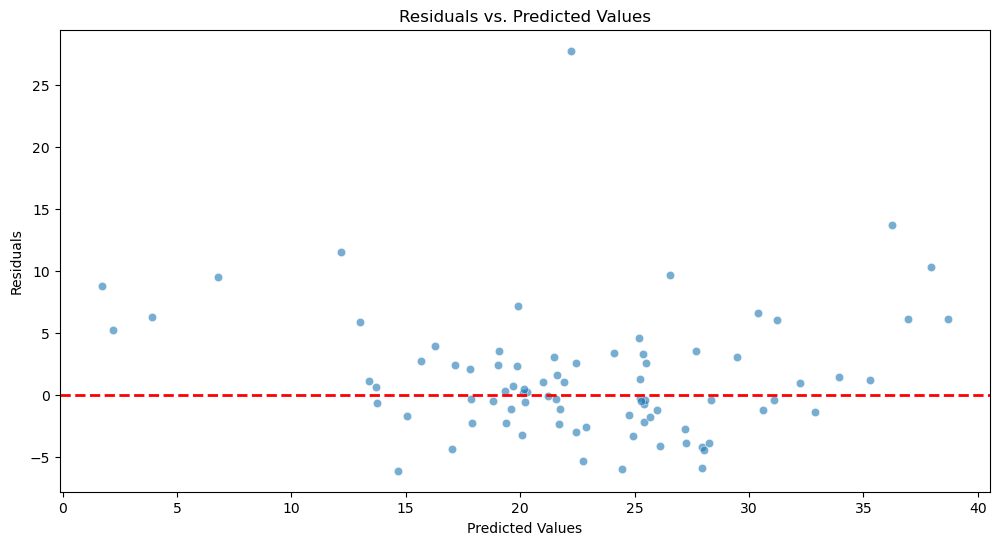

In [43]:
# Calculate residuals
residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(12, 6))

# Plotting
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()


#### Observation
#### Plot Description:
##### ->Axes: The x-axis represents the predicted values, and the y-axis represents the residuals (the difference between actual and predicted values).
##### ->Data Points: Each point on the plot represents the residual for a corresponding predicted value.
##### ->Reference Line: A red dashed horizontal line at y = 0 represents where residuals would be if predictions were perfect.
#### Analysis:
##### ->Distribution: The residuals are scattered around the reference line, indicating the errors in the predictions.
##### ->Homoscedasticity: Ideally, residuals should be randomly dispersed around the horizontal axis (red dashed line). This plot seems to show some random dispersion, but there are clusters and a potential pattern, indicating some heteroscedasticity (unequal variance).
##### ->Outliers: There are some points significantly above or below the horizontal line, indicating large prediction errors for those data points.
#### Interpretation:
##### ->Good Fit: If residuals are randomly scattered and centered around zero, it indicates a good fit. In this plot, while many residuals are close to zero, there is noticeable dispersion.
##### ->Errors: Larger residuals, particularly the ones significantly above or below the horizontal line, highlight predictions that are less accurate.
##### ->Patterns: Any visible pattern in the residual plot (such as a funnel shape or curvature) suggests that the model is not capturing some aspect of the data. Here, there's a slight indication of such patterns, which might suggest room for model improvement.

### Interpret the model's coefficients and understand the impact of different features on housing prices.


Ridge Regression Coefficients:
    Feature  Coefficient
5        RM     2.871971
8       RAD     1.956047
2     INDUS     0.285184
11        B     0.260278
1        ZN     0.044539
3      CHAS     0.000000
6       AGE    -0.419157
4       NOX    -1.110478
0      CRIM    -1.176459
9       TAX    -1.710841
7       DIS    -2.033113
10  PTRATIO    -2.135237
12    LSTAT    -2.979145


C:\Users\server\AppData\Local\Temp\ipykernel_19408\1070123858.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')


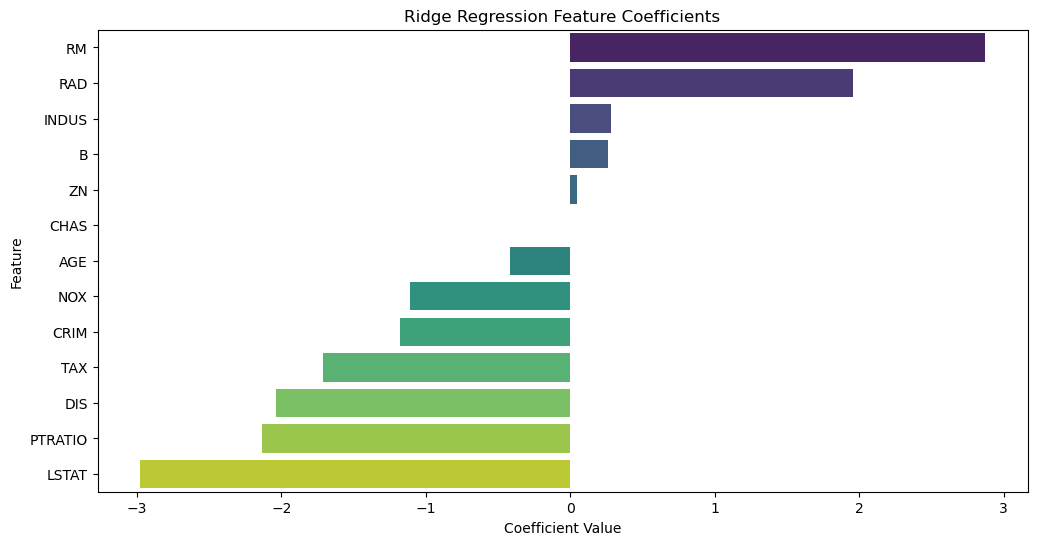

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get coefficients and feature names
coefficients = ridge_reg.coef_
features = X_train.columns

# Create a DataFrame for easier visualization
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Print coefficients
print("Ridge Regression Coefficients:")
print(coef_df)

# Plot coefficients
plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')
plt.title('Ridge Regression Feature Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


#### Explanation
#### Extracting Coefficients:
##### ->ridge_reg.coef_ gives the coefficients from the Ridge Regression model.
##### ->X_train.columns provides the feature names.
#### Creating a DataFrame:
##### ->A DataFrame coef_df is created to hold feature names and their corresponding coefficients.
#### Printing Coefficients:
##### ->Displaying the DataFrame helps in seeing the relationships between features and the target variable.
#### Plotting Coefficients:
##### ->A horizontal bar plot visualizes the coefficients, which helps in comparing the impact of different features.

#### Observation
#### Analysis:
##### ->Positive Coefficients: Features with positive coefficients contribute positively to the predicted outcome. The features with the highest positive coefficients are RM (number of rooms per dwelling) and RAD (index of accessibility to radial highways).
##### ->Negative Coefficients: Features with negative coefficients contribute negatively to the predicted outcome. The feature with the highest negative coefficient is LSTAT (percentage of lower status of the population).
##### ->Magnitude: The magnitude of the coefficients indicates the strength of the contribution of each feature. Larger absolute values indicate stronger influence on the prediction. RM has the largest positive influence, while LSTAT has the largest negative influence.
#### Interpretation:
##### ->Feature Importance: The most influential features in the model are RM, RAD, and LSTAT. These features have the largest coefficients and thus the most significant impact on the predictions.
##### ->Direction of Influence: Positive coefficients (e.g., RM) suggest that higher values of these features are associated with higher predicted outcomes. Negative coefficients (e.g., LSTAT) suggest that higher values of these features are associated with lower predicted outcomes.
##### ->Model Insights: The Ridge Regression model places significant weight on features related to the number of rooms and the socioeconomic status of the population, indicating that these factors are crucial in the prediction task.
